TASK 4

In [2]:
import pytesseract
from PIL import Image
import cv2
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [3]:
def extract_text_from_image(image_path):
    try:
        # Open the image file
        img = Image.open(image_path)
        
        # Use Tesseract to do OCR on the image
        text = pytesseract.image_to_string(img, lang = 'eng')
        
        return text
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    processed_image_path = 'preprocessed_image.png'
    cv2.imwrite(processed_image_path, thresh)

    return processed_image_path

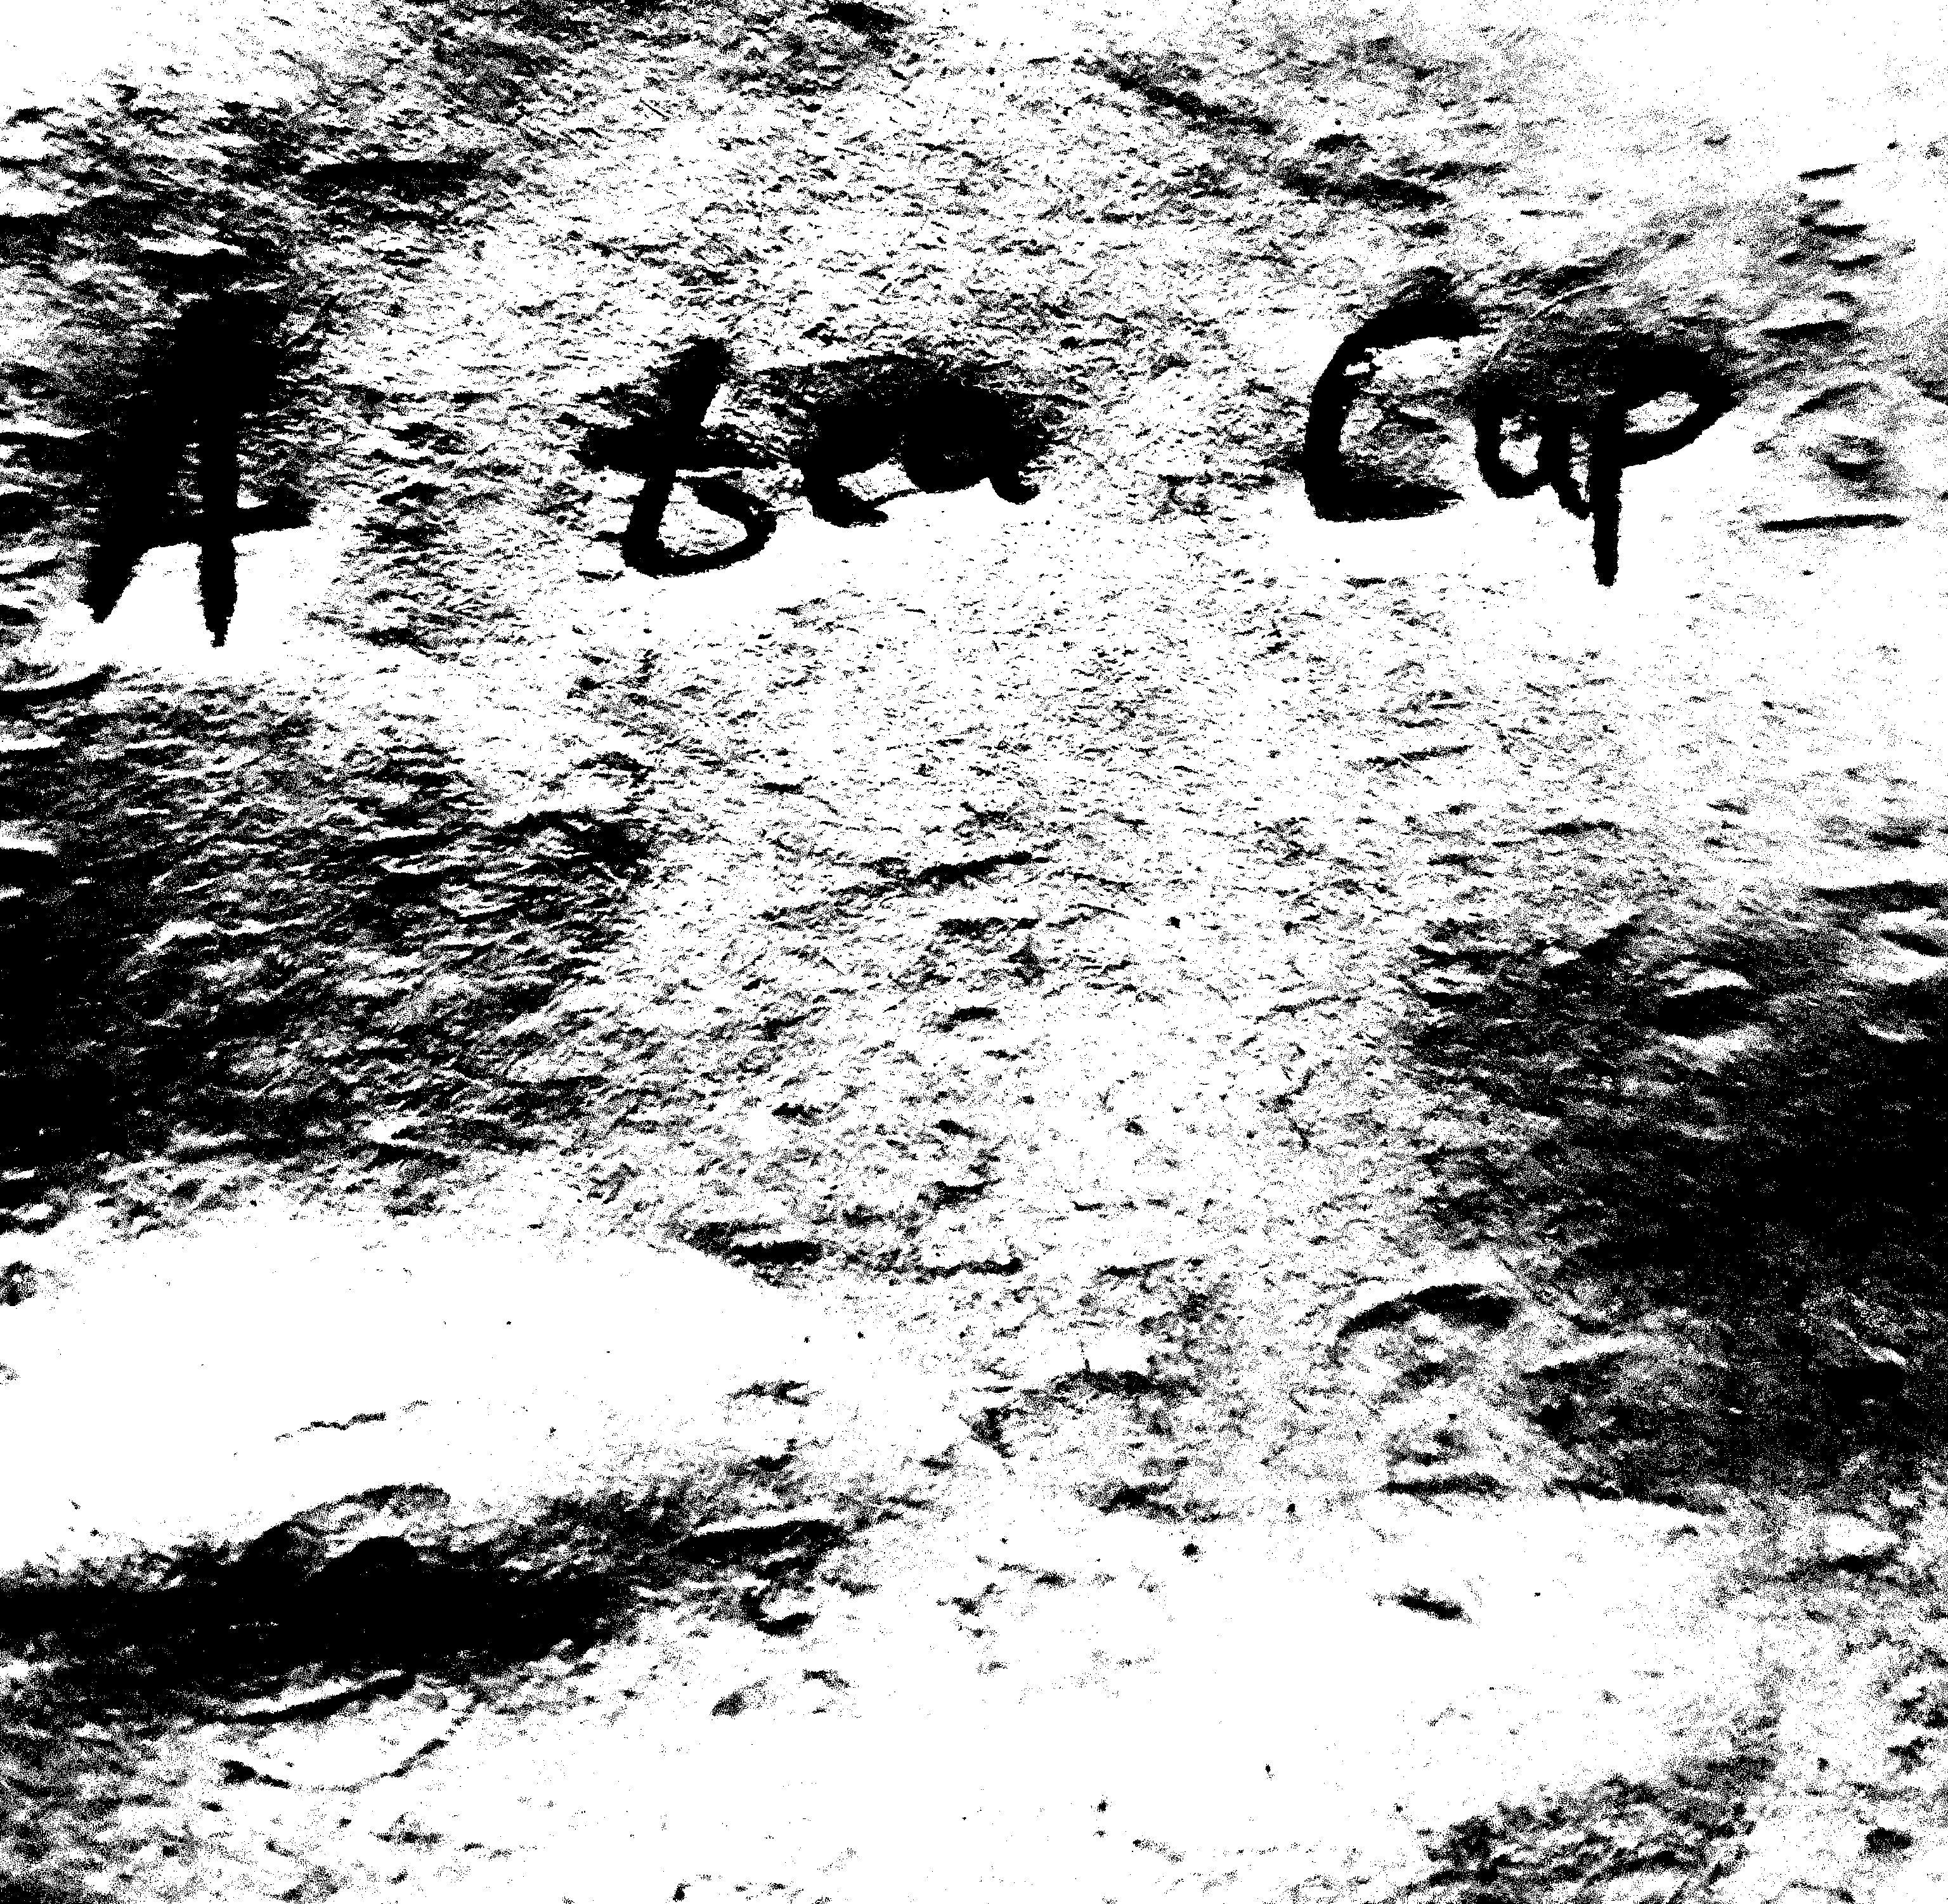

Extracted Text from Preprocessed Image:
 


In [4]:
image_path = 'tea_cup.jpg'
preprocessed_image = preprocess_image(image_path)
im = Image.open(preprocessed_image)
extracted_text = extract_text_from_image(preprocessed_image)
display(im)
print(f"Extracted Text from Preprocessed Image:\n {extracted_text}")

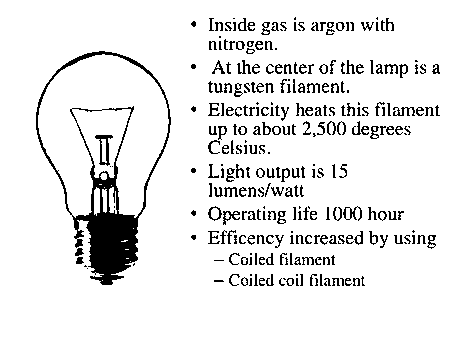

Extracted Text from Preprocessed Image:
 Inside gas is argon with
nitrogen.
At the center of the lamp is a
tungsten filament.
Electricity heats this filament
up to about 2,500 degrees
Celsius.
Light output is 15
lumens/watt
Operating life 1000 hour
Efficency increased by using
— Coiled filament
— Coiled coil filament



In [5]:
image_path = 'lamp_description.jpeg'
preprocessed_image = preprocess_image(image_path)
im = Image.open(preprocessed_image)
extracted_text = extract_text_from_image(preprocessed_image)
display(im)
print(f"Extracted Text from Preprocessed Image:\n {extracted_text}")

TASK 5

In [6]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup

In [7]:
data = pd.read_csv('dataset/dataset.csv')
productID = pd.read_csv('dataset/CNN_Model_Train_Data.csv')

In [8]:
data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,XxYUnited Kingdom☺️


In [9]:
productID.head()

,StockCode
0,ö22384^
1,ö22727^
2,ö22112^
3,ö23298^
4,ö20726^


In [10]:
productID = productID['StockCode'].apply(lambda x: x.strip('ö^'))
productID

0    22384
1    22727
2    22112
3    23298
4    20726
5    21034
6    21931
7    22139
8    22077
9    22423
Name: StockCode, dtype: object

In [11]:
descriptions = data.loc[data['StockCode'].isin(productID)]['Description']
descriptions = list(descriptions.apply(lambda x: str(x).strip('$')).unique())
descriptions

['RETROSPOT TEA SET CERAMIC 11 PC ',
 'CHOCOLATE HOT WATER BOTTLE',
 'LUNCH BAG PINK POLKADOT',
 'JUMBO STORAGE BAG SUKI',
 '6 RIBBONS RUSTIC CHARM',
 'nan',
 'REGENCY CAKESTAND 3 TIER',
 'REX CASH+CARRY JUMBO SHOPPER',
 'ALARM CLOCK BAKELIKE RED ',
 'LUNCH BAG WOODLAND',
 'amazon',
 'faulty',
 'SPOTTY BUNTING',
 'BUNTING , SPOTTY ',
 'damages']

In [34]:
output_dir = 'product_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def download_image(url, path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
    else:
        print(f"Failed to download image from {url}")

for id, description in zip(productID, descriptions):

#     search_url = f"https://www.jumia.com.ng/catalog/?q={description.replace(' ', '+')}"
    des = description.replace(' ', '+')
    search_url = f'https://www.amazon.com/s?k={des}%27%2C&crid=2374IAFXPEP1V&sprefix={des}i%27%2C%2Caps%2C283&ref=nb_sb_noss'
    
    response = requests.get(search_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    image_tags = soup.find_all('img', class_='s-main-slot s-result-list s-search-results sg-row')
    for img_tag in image_tags:
        img_url = img_tag['data-src']
        
        file_path = os.path.join(output_dir, f"{id}.jpg")
        
        download_image(img_url, file_path)
        # break  

print("Image scraping completed.")


Image scraping completed.
